# Comparaison des algorithmes

In [3]:
from pathlib import Path
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
import numpy as np

from lib import core, analysis
from lib.core import Core
from lib import analysis

%matplotlib widget

# Vue d'ensemble

Ce dashboard donne une vue d'ensemble sur les progrès en terme d'analyse et de développement de solutions d'algorithmes de hachage flous.

In [4]:
data = Path("./data")
core = Core(data)

Les algorithmes actuellements supportés sont : 

In [5]:
core.runners()

['lzjd', 'tlsh', 'nilsimsa', 'ssdeep', 'sdhash']

Les benchmarks qui ont été développé sont : 

In [6]:
core.benchmarks()

['image', 'noise', 'noise_images', 'text']

In [7]:
def run(runner, benchmark):
    df = core.run([runner], [benchmark])
    return analysis.pretty(df)


Configuration de base pour visualiser les résultats d'un algorithme donné.

In [8]:
vis_spec_single_runner = r"""{"config":[{"config":{"defaultAggregated":false,"geoms":["circle"],"coordSystem":"generic","limit":-1,"timezoneDisplayOffset":0},"encodings":{"dimensions":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"ref","name":"ref","basename":"ref","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mods","name":"mods","basename":"mods","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"algo","name":"algo","basename":"algo","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0}],"columns":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0}],"color":[{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0}],"opacity":[],"size":[],"shape":[],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0}],"filters":[{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0,"rule":{"type":"one of","value":["image"]}}],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":true,"size":{"mode":"full","width":320,"height":200},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false}},"visId":"gw_DCxV","name":"Image - Format impact"},{"config":{"defaultAggregated":false,"geoms":["circle"],"coordSystem":"generic","limit":-1,"timezoneDisplayOffset":0},"encodings":{"dimensions":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"ref","name":"ref","basename":"ref","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mods","name":"mods","basename":"mods","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"algo","name":"algo","basename":"algo","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0}],"columns":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0}],"color":[{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0}],"opacity":[],"size":[],"shape":[],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0}],"filters":[{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0,"rule":{"type":"one of","value":["text"]}}],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":true,"size":{"mode":"full","width":320,"height":200},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false}},"visId":"gw_bwdB","name":"Text"}],"chart_map":{},"workflow_list":[{"workflow":[{"type":"filter","filters":[{"fid":"bench","rule":{"type":"one of","value":["image"]}}]},{"type":"view","query":[{"op":"raw","fields":["suffix","mod","modval","alt","dist"]}]}]},{"workflow":[{"type":"filter","filters":[{"fid":"bench","rule":{"type":"one of","value":["text"]}}]},{"type":"view","query":[{"op":"raw","fields":["suffix","mod","modval","alt","dist"]}]}]}],"version":"0.4.9.13"}"""
def basic_single_runner_analysis(*runners):
    df = analysis.pretty(core.run(runners, core.benchmarks()))
    df = analysis.long(df)
    return pyg.walk(df, spec=vis_spec_single_runner)


#### Indicators
We used for comparisons between the algorithms 5 indicators:
- False positive rate: the fraction of pairs of dissimilar files juged similar by our algorithm
- Recall: = 1 - False negative rate, the fraction of pairs of similar files juged similar by our algorithm
- Precision: the fraction of pairs of similar files among the pairs juged similars by our algorithm
- Global precision: the fraction of pairs of files that were correctly juged by our algorithm among every pair
- False negative rate: the fraction of pairs of similar files juged dissimilar by our algorithm

They are calculated with the class Indicators(df_similar, df_non_similar, threshold) where df_similar (resp df_non_similar) is the dataframe containing the results of the algorithm on a benchmark with pairs of similar files (resp non_similar).

In [9]:
def indicators_based_analysis(runner, bench_similar, bench_non_similar, suffix=None, Plot=True):
    pos = run(runner, bench_similar) 
    neg = run(runner, bench_non_similar) 

    if suffix:
        pos = pos[pos['suffix'] == suffix]
        neg = neg[neg['suffix'] == suffix]

    return analysis.indicators_based_analysis_on_dfs(pos,neg, Plot=Plot)

## Texts

Running ['lzjd'] with benchs ['text']
Running ['lzjd'] with benchs ['noise']
Running ['lzjd'] with benchs ['text']
Running ['lzjd'] with benchs ['noise']
Running ['tlsh'] with benchs ['text']
Running ['tlsh'] with benchs ['noise']
Running ['tlsh'] with benchs ['text']
Running ['tlsh'] with benchs ['noise']
Running ['nilsimsa'] with benchs ['text']
Running ['nilsimsa'] with benchs ['noise']
Running ['nilsimsa'] with benchs ['text']
Running ['nilsimsa'] with benchs ['noise']
Running ['ssdeep'] with benchs ['text']
Running ['ssdeep'] with benchs ['noise']
Running ['ssdeep'] with benchs ['text']
Running ['ssdeep'] with benchs ['noise']
Running ['sdhash'] with benchs ['text']
Running ['sdhash'] with benchs ['noise']
Running ['sdhash'] with benchs ['text']
Running ['sdhash'] with benchs ['noise']
Running ['lzjd'] with benchs ['text']
Running ['tlsh'] with benchs ['text']
Running ['nilsimsa'] with benchs ['text']
Running ['ssdeep'] with benchs ['text']
Running ['sdhash'] with benchs ['text']


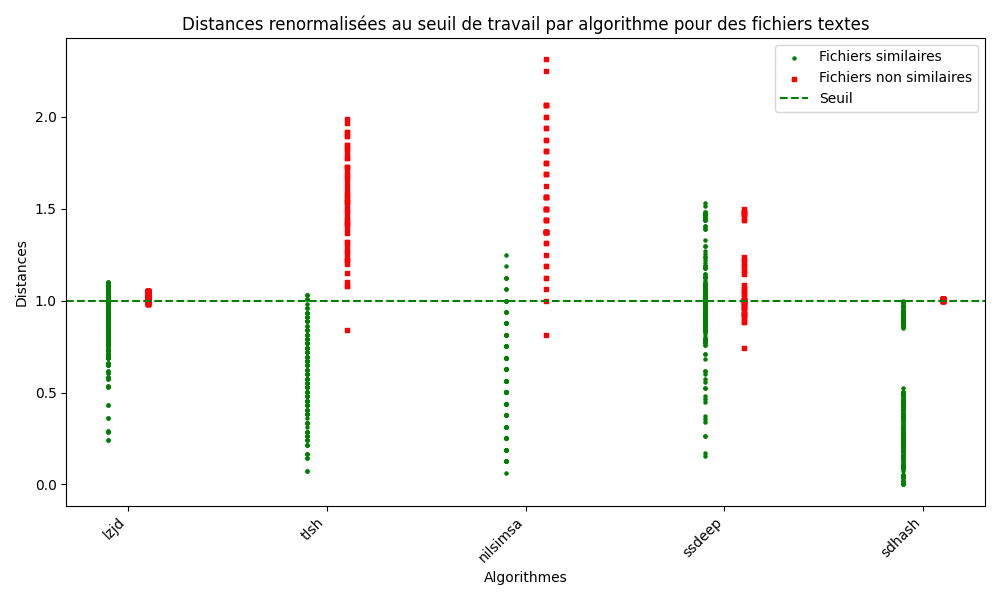

In [13]:
plt.close('all')
runners = core.runners()

thresholds = {}
indicators = {}
for runner in runners:
    thresholds[runner] = indicators_based_analysis(runner, 'text', 'noise', Plot=False)[0]
    indicators[runner] = indicators_based_analysis(runner, 'text', 'noise', Plot=False)[1]

dataframes_similar = {runner:np.array(run(runner,'text')["dist"]) for runner in runners}
dataframes_non_similar = {runner:np.array(run(runner, 'noise')["dist"]) for runner in runners}

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the fisrt algorithm outside of the loop to put the label
ax.scatter([-0.1]*len(dataframes_similar[runners[0]]), dataframes_similar[runners[0]]/thresholds[runners[0]], label='Fichiers similaires', color='green', marker='o', s=5)  # Ronds
ax.scatter([0.1]*len(dataframes_non_similar[runners[0]]), dataframes_non_similar[runners[0]]/thresholds[runners[0]], label='Fichiers non similaires', color='red', marker='s', s=5)  # Carrés

# Tracer les points pour les deux séries
for index, runner in enumerate(core.runners(), start=1):
    ax.scatter([index-1.1]*len(dataframes_similar[runner]), dataframes_similar[runner]/thresholds[runner], color='green', marker='o', s=5)  # Ronds
    ax.scatter([index-0.9]*len(dataframes_non_similar[runner]), dataframes_non_similar[runner]/thresholds[runner], color='red', marker='s', s=5)  # Carrés

# Horizontal line for the threshold
ax.axhline(y=1, color='green', linestyle='--', linewidth=1.5, label='Seuil')

# Ajustements des axes et des labels
x = np.arange(len(runners))
ax.set_xticks(x)
ax.set_xticklabels(runners, rotation=45, ha='right')
ax.set_xlabel('Algorithmes')
ax.set_ylabel('Distances')
ax.set_title('Distances renormalisées au seuil de travail par algorithme pour des fichiers textes')

# Ajout de la légende
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


## Images

### .bmp

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']


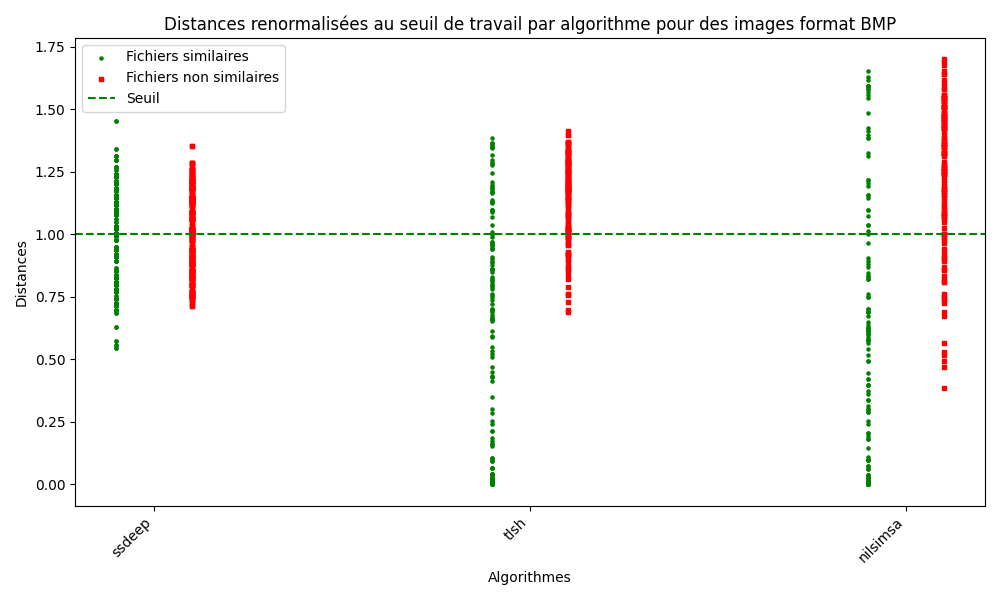

In [16]:
plt.close('all')
runners = ['ssdeep', 'tlsh','nilsimsa']

thresholds = {}
indicators = {}
for runner in runners:
    thresholds[runner] = indicators_based_analysis(runner, 'image', 'noise_images', suffix="bmp", Plot=False)[0]
    indicators[runner] = indicators_based_analysis(runner, 'image', 'noise_images', suffix="bmp", Plot=False)[1]

dataframes_similar = {}
dataframes_non_similar = {}
for runner in runners:
    pos = run(runner, 'image')
    neg = run(runner, 'noise_images')
    dataframes_similar[runner] = np.array(pos[pos['suffix'] == 'bmp']["dist"])
    dataframes_non_similar[runner] = np.array(neg[neg['suffix'] == 'bmp']["dist"])
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the fisrt algorithm outside of the loop to put the label
ax.scatter([-0.1]*len(dataframes_similar[runners[0]]), dataframes_similar[runners[0]]/thresholds[runners[0]], label='Fichiers similaires', color='green', marker='o', s=5)  # Ronds
ax.scatter([0.1]*len(dataframes_non_similar[runners[0]]), dataframes_non_similar[runners[0]]/thresholds[runners[0]], label='Fichiers non similaires', color='red', marker='s', s=5)  # Carrés

# Tracer les points pour les deux séries
for index, runner in enumerate(runners, start=1):
    ax.scatter([index-1.1]*len(dataframes_similar[runner]), dataframes_similar[runner]/thresholds[runner], color='green', marker='o', s=5)  # Ronds
    ax.scatter([index-0.9]*len(dataframes_non_similar[runner]), dataframes_non_similar[runner]/thresholds[runner], color='red', marker='s', s=5)  # Carrés

# Horizontal line for the threshold
ax.axhline(y=1, color='green', linestyle='--', linewidth=1.5, label='Seuil')

# Ajustements des axes et des labels
x = np.arange(len(runners))
ax.set_xticks(x)
ax.set_xticklabels(runners, rotation=45, ha='right')
ax.set_xlabel('Algorithmes')
ax.set_ylabel('Distances')
ax.set_title('Distances renormalisées au seuil de travail par algorithme pour des images format BMP')

# Ajout de la légende
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### .jpg

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']


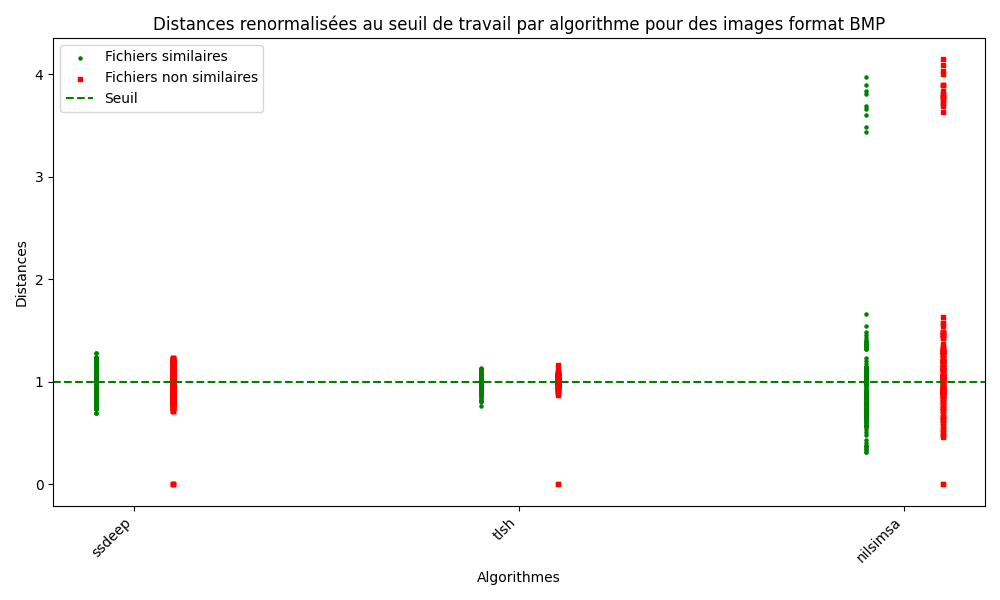

In [17]:
plt.close('all')
runners = ['ssdeep', 'tlsh','nilsimsa']

thresholds = {}
indicators = {}
for runner in runners:
    thresholds[runner] = indicators_based_analysis(runner, 'image', 'noise_images', suffix="jpg", Plot=False)[0]
    indicators[runner] = indicators_based_analysis(runner, 'image', 'noise_images', suffix="jpg", Plot=False)[1]

dataframes_similar = {}
dataframes_non_similar = {}
for runner in runners:
    pos = run(runner, 'image')
    neg = run(runner, 'noise_images')
    dataframes_similar[runner] = np.array(pos[pos['suffix'] == 'jpg']["dist"])
    dataframes_non_similar[runner] = np.array(neg[neg['suffix'] == 'jpg']["dist"])
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the fisrt algorithm outside of the loop to put the label
ax.scatter([-0.1]*len(dataframes_similar[runners[0]]), dataframes_similar[runners[0]]/thresholds[runners[0]], label='Fichiers similaires', color='green', marker='o', s=5)  # Ronds
ax.scatter([0.1]*len(dataframes_non_similar[runners[0]]), dataframes_non_similar[runners[0]]/thresholds[runners[0]], label='Fichiers non similaires', color='red', marker='s', s=5)  # Carrés

# Tracer les points pour les deux séries
for index, runner in enumerate(runners, start=1):
    ax.scatter([index-1.1]*len(dataframes_similar[runner]), dataframes_similar[runner]/thresholds[runner], color='green', marker='o', s=5)  # Ronds
    ax.scatter([index-0.9]*len(dataframes_non_similar[runner]), dataframes_non_similar[runner]/thresholds[runner], color='red', marker='s', s=5)  # Carrés

# Horizontal line for the threshold
ax.axhline(y=1, color='green', linestyle='--', linewidth=1.5, label='Seuil')

# Ajustements des axes et des labels
x = np.arange(len(runners))
ax.set_xticks(x)
ax.set_xticklabels(runners, rotation=45, ha='right')
ax.set_xlabel('Algorithmes')
ax.set_ylabel('Distances')
ax.set_title('Distances renormalisées au seuil de travail par algorithme pour des images format BMP')

# Ajout de la légende
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### .png

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']


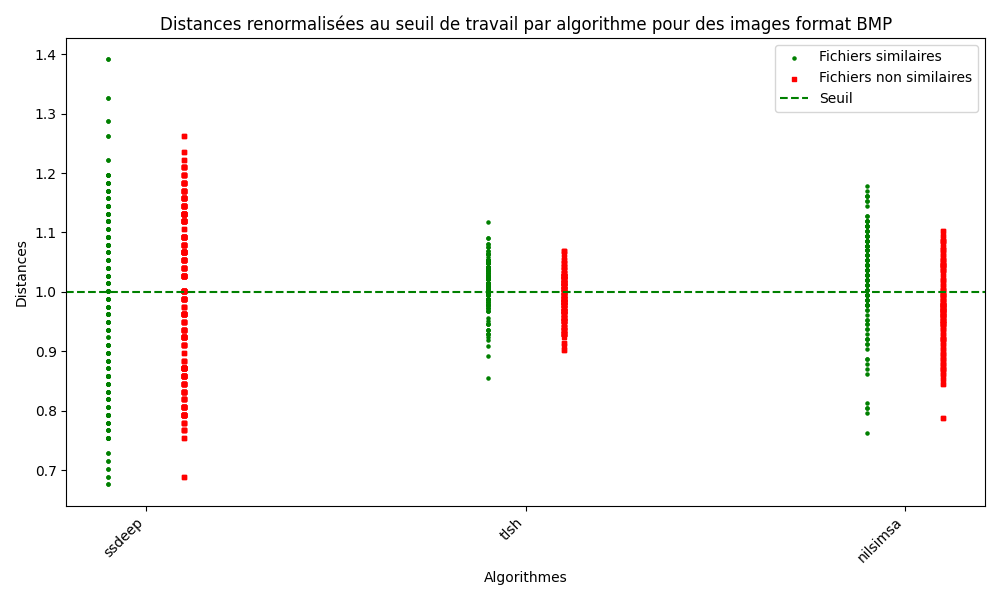

In [18]:
plt.close('all')
runners = ['ssdeep', 'tlsh','nilsimsa']

thresholds = {}
indicators = {}
for runner in runners:
    thresholds[runner] = indicators_based_analysis(runner, 'image', 'noise_images', suffix="png", Plot=False)[0]
    indicators[runner] = indicators_based_analysis(runner, 'image', 'noise_images', suffix="png", Plot=False)[1]

dataframes_similar = {}
dataframes_non_similar = {}
for runner in runners:
    pos = run(runner, 'image')
    neg = run(runner, 'noise_images')
    dataframes_similar[runner] = np.array(pos[pos['suffix'] == 'png']["dist"])
    dataframes_non_similar[runner] = np.array(neg[neg['suffix'] == 'png']["dist"])
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the fisrt algorithm outside of the loop to put the label
ax.scatter([-0.1]*len(dataframes_similar[runners[0]]), dataframes_similar[runners[0]]/thresholds[runners[0]], label='Fichiers similaires', color='green', marker='o', s=5)  # Ronds
ax.scatter([0.1]*len(dataframes_non_similar[runners[0]]), dataframes_non_similar[runners[0]]/thresholds[runners[0]], label='Fichiers non similaires', color='red', marker='s', s=5)  # Carrés

# Tracer les points pour les deux séries
for index, runner in enumerate(runners, start=1):
    ax.scatter([index-1.1]*len(dataframes_similar[runner]), dataframes_similar[runner]/thresholds[runner], color='green', marker='o', s=5)  # Ronds
    ax.scatter([index-0.9]*len(dataframes_non_similar[runner]), dataframes_non_similar[runner]/thresholds[runner], color='red', marker='s', s=5)  # Carrés

# Horizontal line for the threshold
ax.axhline(y=1, color='green', linestyle='--', linewidth=1.5, label='Seuil')

# Ajustements des axes et des labels
x = np.arange(len(runners))
ax.set_xticks(x)
ax.set_xticklabels(runners, rotation=45, ha='right')
ax.set_xlabel('Algorithmes')
ax.set_ylabel('Distances')
ax.set_title('Distances renormalisées au seuil de travail par algorithme pour des images format BMP')

# Ajout de la légende
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()
